In [1]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [2]:
os.makedirs('datasets', exist_ok=True)

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NYPwtDfo5Q6FB0JPFuK9")
project = rf.workspace("pizza-xlbtr").project("pizza-hneug")
dataset = project.version(2).download("yolov7")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pizza-2 in yolov7pytorch:: 100%|██████████| 2693/2693 [00:00<00:00, 6040.62it/s]


In [6]:
%%writefile pizza-2.yaml
path: '../pizza-2/'
train: 'train/images'
val: 'valid/images'

# class names
names:
  0: 'basil'
  1: 'beef'
  2:  'dw'
  3: 'ham'
  4:  'hamburger'
  5: 'olive'
  6: 'olives'
  7: 'onion'
  8: 'pepper'
  9: 'pepperoni'
  10:  'pesto'
  11: 'pineapple'
  12: 'pizza'
  13: 'soup'

Writing pizza-2.yaml


In [7]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 8.0 MB/s eta 0:00:00


In [9]:
# Hyperparamets
EPOCHS = 50
BATCH = 5
IMG_SIZE = 1280

In [10]:
# Fine tuning YOLOV8 Nani model
!yolo \
task = detect \
mode = train \
model = yolov8n.pt \
imgsz = {IMG_SIZE} \
data = pizza-2.yaml \
epochs = {EPOCHS} \
batch = {BATCH} \
name = yolov8n_v8_50e

100% 6.23M/6.23M [00:00<00:00, 120MB/s]
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=pizza-2.yaml, epochs=50, time=None, patience=50, batch=5, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [12]:
# Evaluation on Validation Images

!yolo \
task = detect \
mode = val \
model = runs/detect/yolov8n_v8_50e/weights/best.pt \
name = yolov8n_eval \
data = pizza-2.yaml

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/pizza-2/valid/labels.cache... 269 images, 0 backgrounds, 0 corrupt: 100% 269/269 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:14<00:00,  1.20it/s]
                   all        269        650      0.273      0.235      0.242      0.103
                 basil        269         55      0.249     0.0909       0.15     0.0469
                  beef        269          3          0          0          0          0
                    dw        269          2          0          0          0          0
                   ham        269          5          0          0          0          0
             hamburger        269         62       0.56      0.694      0.693      0.346
                olives        269         94          

In [16]:
# Inference on Validation Images

!yolo \
task = detect \
mode = predict \
model = runs/detect/yolov8n_v8_50e/weights/best.pt \
source = pizza-2/valid/images \
imgsz = 1280 \
name = yolov8n_v8_50e_infer1280 \
show_labels = False

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

image 1/269 /content/pizza-2/valid/images/010KDSPG3ZMB_jpg.rf.7171f6cdd28562c2fe17bea2f6572164.jpg: 1280x1280 1 pizza, 19.7ms
image 2/269 /content/pizza-2/valid/images/019ZIPQRVHTN_jpg.rf.b20837bf9df8e7ca4adc27eeeda0f36e.jpg: 1280x1280 1 hamburger, 19.7ms
image 3/269 /content/pizza-2/valid/images/01SWHNHG851Y_jpg.rf.540aae39529844367bdb395680d9e6d3.jpg: 1280x1280 (no detections), 19.7ms
image 4/269 /content/pizza-2/valid/images/02F5M1KSU8SG_jpg.rf.5a7827f4524ce2b0dcf42a178ec411b4.jpg: 1280x1280 3 pizzas, 19.7ms
image 5/269 /content/pizza-2/valid/images/02S55QTBMWN7_jpg.rf.235e2349a0606ef9f3ece7e490fce666.jpg: 1280x1280 1 soup, 19.7ms
image 6/269 /content/pizza-2/valid/images/034CF1N6Z88X_jpg.rf.56ff0c79a4f9f013738fcda5125b97a0.jpg: 1280x1280 1 hamburger, 19.7ms
image 7/269 /content/pizza-2/valid/images/03NI3BOBN32E_jpg.rf.

In [17]:
# Vizualize Validation Results

# plot and visualize images
def visualize(result_dir, num_samples = 4):
  plt.figure(figsize=(20,12))
  image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
  random.shuffle(image_names)
  for i, image_name in enumerate(image_names):
    image = plt.imread(image_name)
    plt.subplot(2,2, i+1)
    plt.imshow(image)
    plt.axis('off')
    if i == num_samples -1:
      break

  plt.tight_layout()
  plt.show()

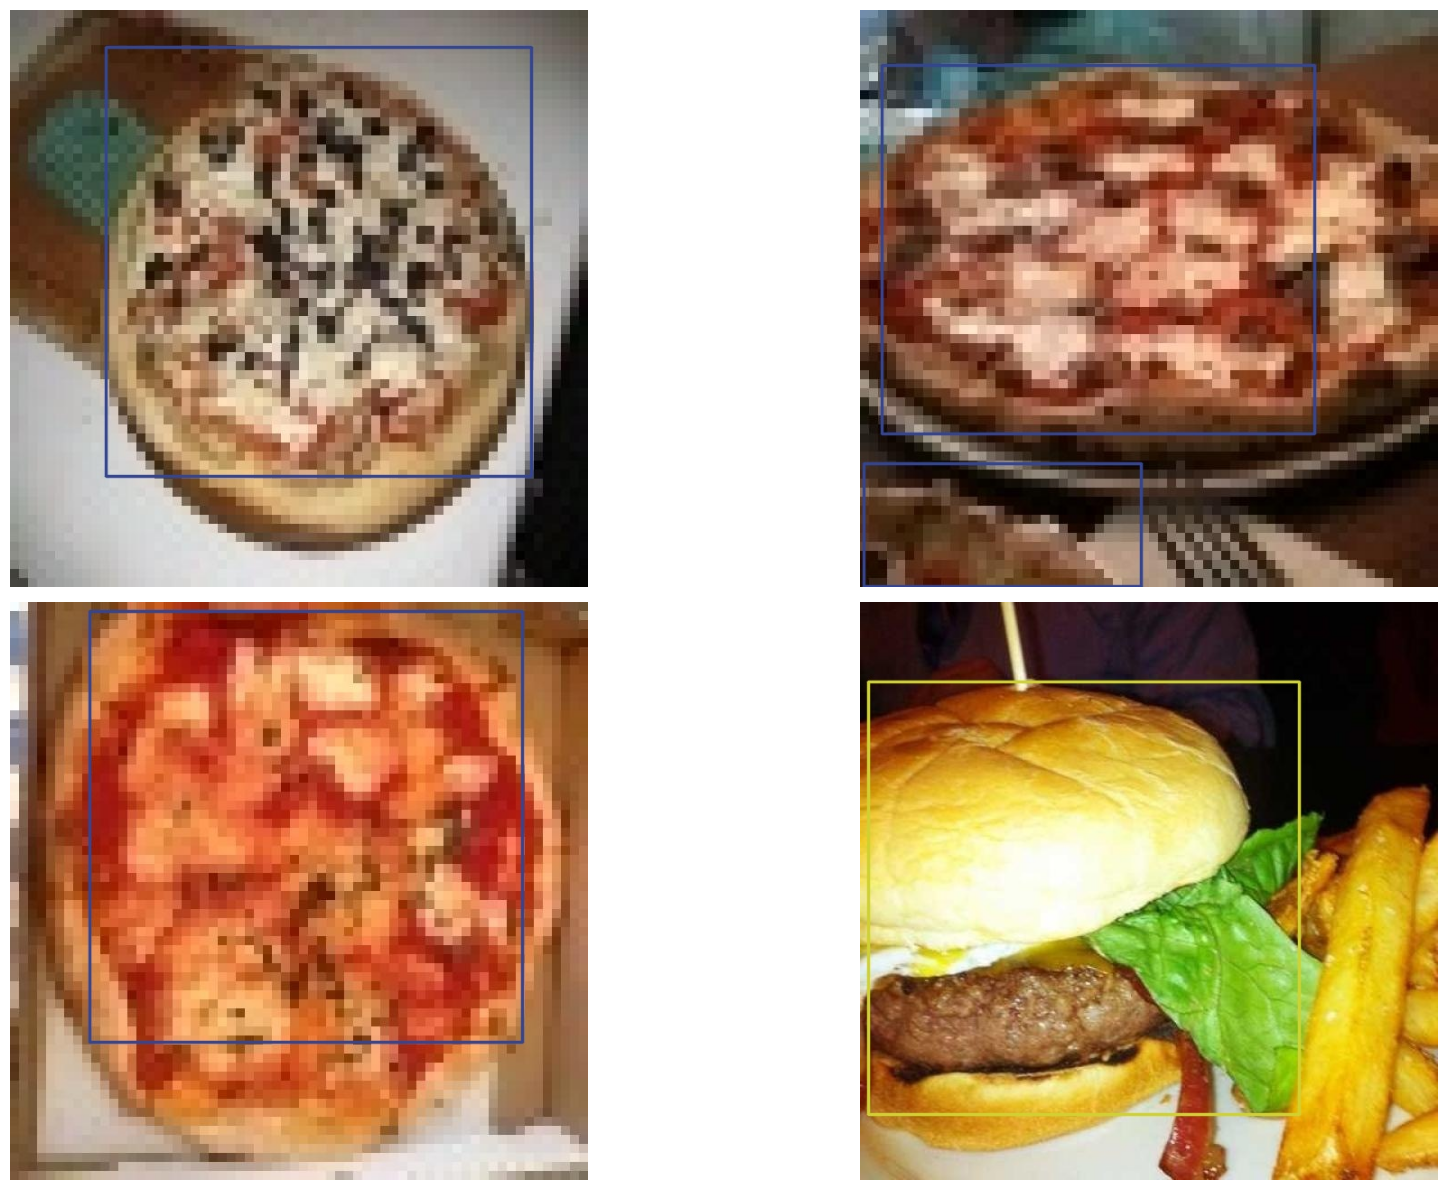

In [18]:
visualize('runs/detect/yolov8n_v8_50e_infer1280/')